In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import cv2
import random
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import StandardScaler

##importando bibliotecas a serem usadas


In [2]:
d = {'malignant':1,
     'benign':0}
df = pd.read_csv('C:\\Users\\rhuan\\OneDrive\\Área de Trabalho\\COLAB\\Machine Learning\\breast_cancer.csv')
df['diagnosis'] = df['diagnosis'].map(d)
df

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


##importando os dados da breast cancer


##A coluna de diagnosis é remapeada para identificar maligno com valor 1, e benigno com valor 0

In [3]:
y = df['diagnosis'].values
X= df.iloc[:, 1:31].values

##Jogando na matriz X os valores das tabela, e no array y o rótulo

In [4]:
def descritive(x):
    # calculating descriptives of variable
    min = np.min(x)
    max = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = np.median(x)
    std = x.std()
    skew = sp.stats.skew(x)
    kurt = sp.stats.kurtosis(x)
    x

    # calculating points of standard deviation
    points = mean-std, mean+std

    sns.distplot(x,hist=True, kde=True)
    plt.ylabel('density')
    print(f"std {round(mean-std,2)} {round(mean+std,2)}") 
    print(f"kurtosis {round(kurt,2)}") 
    print(f"skewnees {round(skew,2)}") 
    print(f"range {round(min,2),round(max,2),round(ran,2)}") 
    print(f"mean {round(mean,2)}") 
    print(f"median {round(median,2)}")

##codigo do professor usado para verificar se é gaussiana, usando KDE plot e histograma
*Referência: Professor Dalcimar Casanova*

(-0.5, 536.5, 302.5, -0.5)

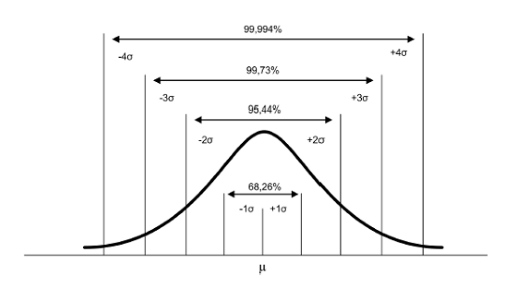

In [5]:
img = cv2.imread( 'gaussiana.png')
plt.imshow(img)
plt.axis('off')

##A imagem representa uma curva gaussiana, onde são considerados outliers valores abaixo/acima de 3 desvios padrões  em relação à média.

Número sorteado: 8
std 0.15 0.21
kurtosis 1.27
skewnees 0.72
range (0.11, 0.3, 0.2)
mean 0.18
median 0.18


C:\Users\rhuan\AppData\Local\Temp\ipykernel_12508\3241185990.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=True, kde=True)


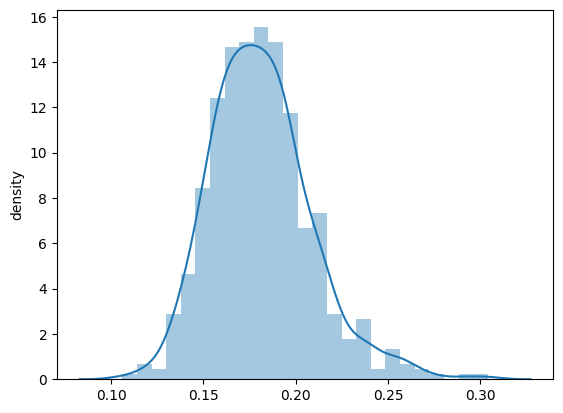

In [19]:
r = random.randrange(0,30)
print(f'Número sorteado: {r}')
descritive(x = X[:,r])


##Nota-se que sim, os dados seguem uma distribuição gaussiana. Joguei uma função de números aleatórios para observar diferentes gráficos, e é notável também que quando há skew, todos são right-skewed (moda<mediana<média, skewnees positivo)

std 67.69 116.25
kurtosis 0.95
skewnees 0.99
range (43.79, 188.5, 144.71)
mean 91.97
median 86.24


C:\Users\rhuan\AppData\Local\Temp\ipykernel_12508\802928407.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=True, kde=True)


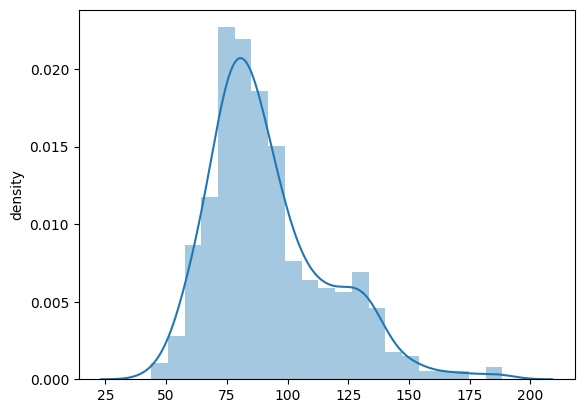

In [21]:
descritive(X[:,2])

##Existe 1 outlier por exemplo, no gráfico 2, observe entre o número 175 e 200 no eixo x


std 0.11 0.16
kurtosis 0.5
skewnees 0.41
range (0.07, 0.22, 0.15)
mean 0.13
median 0.13


C:\Users\rhuan\AppData\Local\Temp\ipykernel_12508\802928407.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=True, kde=True)


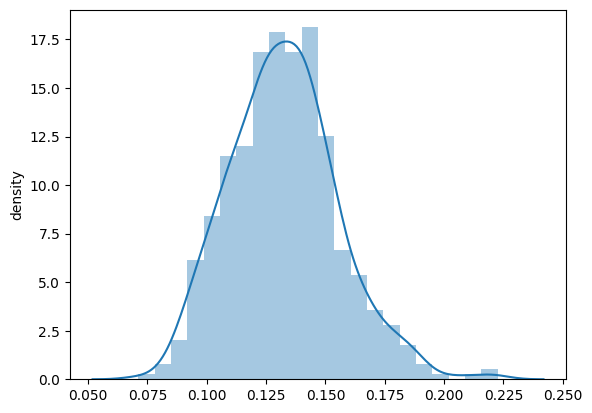

In [22]:
descritive(X[:,24])

##Outro gráfico com um outlier notável é o 24, observe no eixo x entre os numeros .200 e .225

((array([-3.03131803, -2.75272827, -2.59632176, -2.48554115, -2.39881665,
         -2.32708327, -2.26563862, -2.21171731, -2.16355017, -2.11993444,
         -2.08001388, -2.04315654, -2.00888218, -1.97681704, -1.94666425,
         -1.91818399, -1.89117962, -1.86548784, -1.84097146, -1.81751413,
         -1.79501625, -1.77339186, -1.75256629, -1.7324742 , -1.7130581 ,
         -1.69426711, -1.67605601, -1.65838438, -1.64121597, -1.62451811,
         -1.6082613 , -1.59241874, -1.57696607, -1.56188103, -1.54714326,
         -1.53273408, -1.51863628, -1.504834  , -1.49131259, -1.47805847,
         -1.46505902, -1.45230254, -1.43977811, -1.42747554, -1.41538531,
         -1.40349849, -1.39180675, -1.38030222, -1.36897754, -1.35782575,
         -1.34684032, -1.33601506, -1.32534413, -1.31482203, -1.30444351,
         -1.29420363, -1.28409769, -1.27412121, -1.26426996, -1.2545399 ,
         -1.24492718, -1.23542814, -1.22603929, -1.21675729, -1.20757895,
         -1.19850123, -1.18952121, -1.

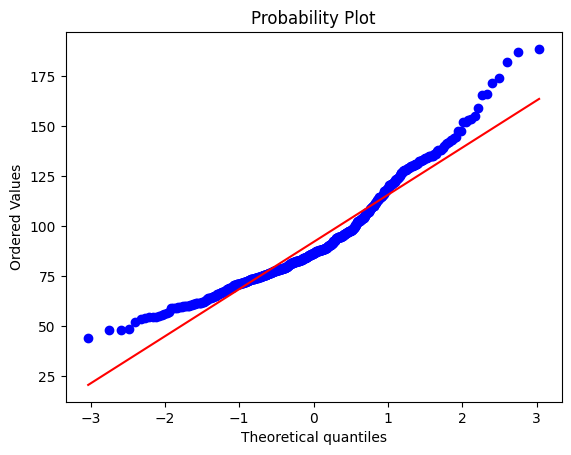

In [24]:
data_points = X[:,2]
sp.stats.probplot(data_points, dist="norm", plot=plt)

##qqplot do gráfico 2


O qqplot é e uma ferramenta utilizada para verificar a validade de um pressuposto de distribuição para um dataset. Em
geral, a ideia é calcular o valor esperado para cada ponto, baseado na distribuição em questão. Caso esteja na distribuição esperada, os pontos se aproximarão de uma reta. (Ref: *Fernando Lucambio Pérez*)

<Axes: >

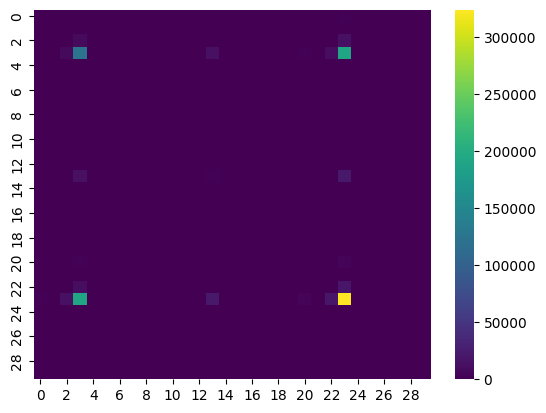

In [17]:
cov = np.cov(X.T)
sns.heatmap(cov, cmap = 'viridis')
#cov

##Covariancias plotadas no heatmap, oscilam entre o que parece ser 70k até quase 300k

<Axes: >

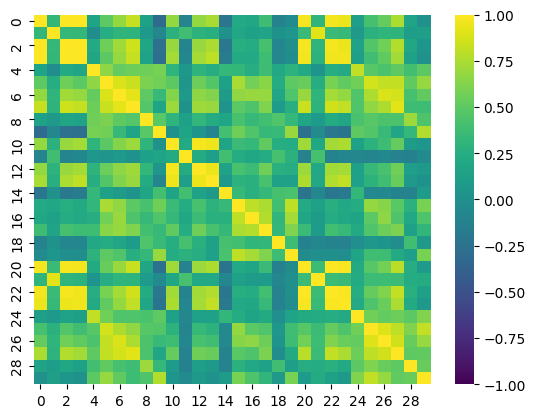

In [18]:
corr = np.corrcoef(X.T)
sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis')
#corr

##O Gráfico mostra as correlações dos dados plotadas no heatmap


In [26]:
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

##Normalizando os dados da matriz X

<Axes: >

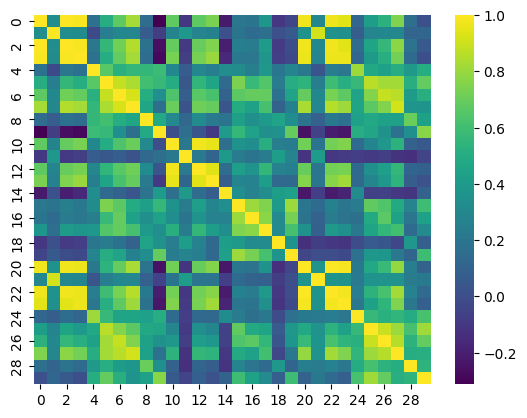

In [27]:
cov_norm = np.cov(X_norm.T)
sns.heatmap(cov_norm, cmap = 'viridis')
#cov

##Note que quando se usa a covariancia dos dados normalizados, o gráfico fica muito parecido com o das correlações

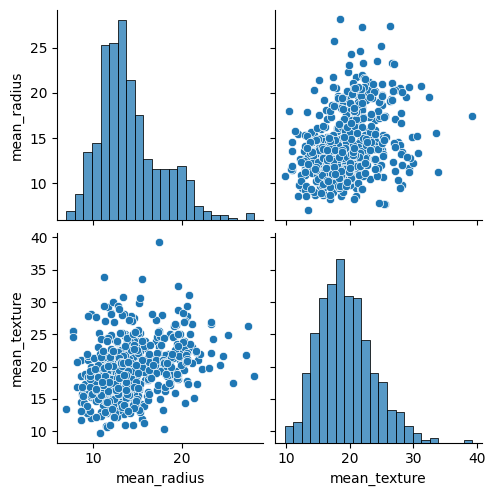

In [28]:
df_sub = df[['mean_radius','mean_texture']]
sns.pairplot(df_sub)


##Usando a pairplot para observar os dados das colunas mean_radius e mean_texture

C:\Users\rhuan\AppData\Local\Temp\ipykernel_12508\802928407.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=True, kde=True)


std -1.0 1.0
kurtosis 0.95
skewnees 0.99
range (-1.98, 3.98, 5.96)
mean -0.0
median -0.24


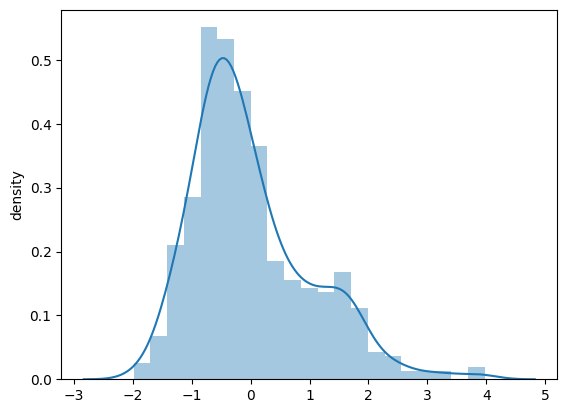

In [29]:
descritive(X_norm[:,2])

##Existe 1 outlier por exemplo, no gráfico 2, observe que existem outliers, é só observar após o número 3 no eixo x (visto que o desvio padrão é 1, se está acima de 3*(desvio padrão) é um outlier)

##Este gráfico foi o mesmo utilizado numa parte acima, mas agora normalizado

0
std -1.0 1.0
kurtosis 0.83
skewnees 0.94
range (-2.03, 3.97, 6.0)
mean -0.0
median -0.22


C:\Users\rhuan\AppData\Local\Temp\ipykernel_12508\802928407.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=True, kde=True)


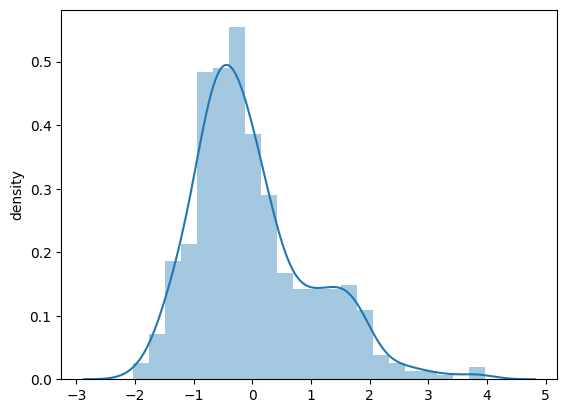

In [36]:
r1 = random.randrange(0,30)
print(r1)
descritive(X_norm[:,r1])

##joguei novamente uma função para mostrar os gráficos de forma aleatória
##Qualquer gráfico com dados normalizados mostrando algo menor que -3 ou maior que 3 tem outliers!